In [24]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
from scipy.interpolate import RectBivariateSpline
path = '../PostBornEma/'
sys.path.append("../scripts/") 
import Cosmology as Cosmo
from lab import *

In [25]:
#general settings
LSST = True
#if not LSST redhsift kernel
chi0 = chi_cmb/6.
sigma_chi = chi_cmb/14.
bin_num = 1
z_source = z_cmb

if LSST:
    if z_source==z_cmb:
        file_ext = 'lsst%s_cmblens'%str(bin_num)
    else:
        file_ext = 'lsst%s_deltalens_z%d'%(str(bin_num),z_source*10)

else:
    if z_source==z_cmb:
        file_ext = 'gaussgal_chi0%d_sigmachi%d_cmblens'%(chi0,sigma_chi)
    else:
        file_ext = 'gaussgal_chi0%d_sigmachi%d_deltalens_z%d'%(chi0,sigma_chi,z_source*10) 
print(file_ext)

lsst1_cmblens


In [26]:
"""------------settings----------------"""
fsky        = 1.

params      = Cosmo.EmasCosmology
tag         = params[0]['name']
nl          = False

N0_path     ='../output/N0files/'
spec_path   ='../output/cls/'
path        ='../noise_curves/'
class_cl    ='../output/ClassCls/'

if z_source==z_cmb:
    thetaFWHMarcmin = 1. #beam FWHM
    noiseUkArcmin   = 1. #eval(sys.argv[1]) #Noise level in uKarcmin
    l_max_T         = 3000
    l_max_P         = 5000
    l_min           = 50
    L_max           = 6000 #for l integration
    L_min           = 1
    TCMB            = 2.7255e6
    div             = True #divide EB by factor of 2.5
    channel         = 'mv'
    lens_ext        = 'CMB_S4'

    if l_max_T!=l_max_P:
        lmax='mixedlmax_%d_%d'%(l_max_T,l_max_P)
    else:
        lmax=str(l_max_T)

    if nl:
      nl_='_nl'
    else:
      nl_=''

    if div:
        print 'Dividing EB by factor 2.5!'
        no_div='div25'
    else:
        no_div='nodiv'

else:
    print('using lensing survey')
    sigma_2  = 0.26**2
    Ngal     = 60*(180.*60./np.pi)**2
    lens_ext = '026_60'

Dividing EB by factor 2.5!


In [27]:
ell, clkk = np.load(spec_path+'Clkk_%s.npy'%(file_ext))
ell, clgg = np.load(spec_path+'Clgg_%s.npy'%(file_ext))
ell, clkg = np.load(spec_path+'Clkg_%s.npy'%(file_ext))

../output/N0files/OurPostBornPaper_N0_mixedlmax_3000_5000_50_1010_div25.pkl


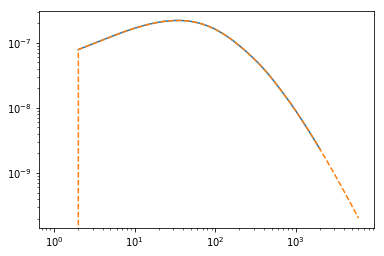

In [28]:
if z_source == z_cmb:
    print N0_path+'%s_N0_%s_%d_%d%d_%s%s.pkl'%(tag,lmax,l_min,10*noiseUkArcmin,10*thetaFWHMarcmin,no_div,nl_)
    filename = N0_path+'%s_N0_%s_%d_%d%d_%s%s.pkl'%(tag,lmax,l_min,10*noiseUkArcmin,10*thetaFWHMarcmin,no_div,nl_)
    Ls,AL    = pickle.load(open(filename,'r'))

    class_file  = 'class_cls_%s%s.pkl'%(tag,nl_)
    Parameter,cl_unl,cl_len = pickle.load(open(class_cl+'%s'%class_file,'r'))
    ll = cl_len['ell']    
                    
    # class versus our clkk spectra comparison
    plt.figure()
    plt.loglog(ell_,clkk)
    plt.loglog(ll, 1/4.*(ll*(ll+1))**2*cl_len['pp'],ls='--')                       

In [29]:
L    = np.logspace(np.log10(min(ell_)),np.log10(1000),100)
clkk_= np.interp(L,ell_,clkk)
clgg_= np.interp(L,ell_,clgg)
clkg_= np.interp(L,ell_,clkg)
if z_source==z_cmb:
    n0  = np.interp(L,Ls,1./4.*(Ls*(Ls+1))**2*AL[channel])
else:
    print('galax lensing')
    n0 = sigma_2/Ngal
    
norm  = dNdz_LSST(bin_num, return_norm=True)
n_bar = norm*(180*60/np.pi)**2

print(norm)

noise_kk = clkk_+n0
noise_gg = clgg_+1./n_bar

23.9432092389


In [30]:
noise_kk_      = np.sqrt((2./(2.*L+1.)/fsky)*(noise_kk)**2)
noise_gg_      = np.sqrt((2./(2.*L+1.)/fsky)*(noise_gg)**2)
noise_kg_      = 1./(2.*L+1.)/fsky*((noise_kk)*(noise_gg)+clkg_**2)
noise_kg_      = np.sqrt(noise_kg_)

In [31]:
np.save('../output/noise_curves/kg_noise_%s_%s'%(file_ext,lens_ext),[L,noise_kg_])

(0, 2)

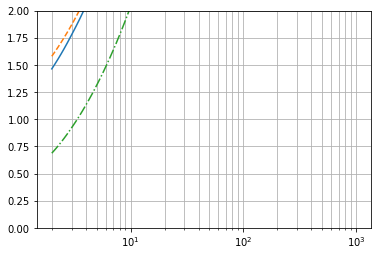

In [32]:
plt.figure()
#plt.loglog(L,)
plt.plot(L,clkk_/(noise_kk_),ls='-')
#plt.loglog(L,)
plt.plot(L,clgg_/(noise_gg_),ls='--')
plt.semilogx(L,clkg_/(noise_kg_),ls='-.')
plt.grid(which='both')
plt.ylim(0,2)

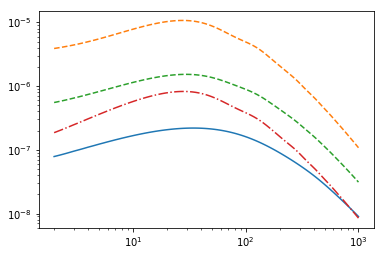

In [33]:
plt.figure()
#plt.loglog(L,)
plt.plot(L,clkk_,ls='-')
#plt.loglog(L,)
plt.loglog(L,clgg_,ls='--')
plt.loglog(L,np.sqrt(clgg_*clkk_),ls='--')
plt.plot(L,clkg_,ls='-.')

#plt.ylim(0,2)

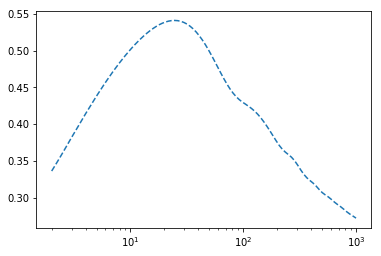

In [36]:
plt.semilogx(L,clkg_/np.sqrt(clgg_*clkk_),ls='--')

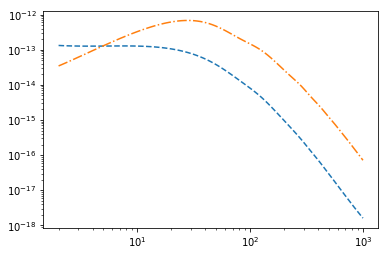

In [35]:
plt.plot(L,noise_gg_*noise_kk_,ls='--')
plt.loglog(L,clkg_**2,ls='-.')